## PROJETO: Análise de Dados com SQL - HashtagMovie

#### Autor: Lívia Borges Pinheiro
#### Este notebook apresenta a análise exploratória de dados de uma locadora de filmes fictícia, com o objetivo de entender o comportamento dos clientes, o desempenho dos filmes e identificar oportunidades de negócio. A análise foi dividida em etapas:

#### 1. CONEXÃO COM O BANCO DE DADOS
#### 2. IMPORTAÇÃO DE TABELAS
#### 3. VISÃO GERAL DOS DADOSs
#### 4. LIMPEZA E TRANSFORMAÇÃO 
##### 4.1 Tabela Clientes
##### 4.2 Tabela Filmes
##### 4.3 Tabela Aluguéis
##### 4.4 Tabela Atores
##### 4.5 Tabela Atuações
#### 5. ANÁLISE EXPLORATÓRIA POR TÓPICO
##### 5.1 Análise de Clientes
##### 5.2 Análise de Filmes
##### 5.3 Análise de Aluguéis
##### 5.4 Análise de Atores
##### 5.5 Análise de Atuações
#### 6. GERAÇAO DE ARQUIVOS PARA O POWER BI
#### 7. CONCLUSÕES FINAIS

### 1. BIBLIOTECAS E CONEXÃO

In [5]:
# IMPORTANDO BIBLIOTECAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [6]:
# Instalação de Pacotes

!pip install pymysql

In [7]:
# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#### CONECTANDO AO BANCO DE DADOS

In [9]:
# Configurações de conexão
usuario = 'root'
senha = ''
host = 'localhost'
porta = '3306'
banco = 'hashtagmovie'

# Criando engine de conexão
engine = create_engine(f'mysql+pymysql://{usuario}:{senha}@{host}:{porta}/{banco}')

In [10]:
from sqlalchemy import text

# Teste de conexão: listar as tabelas do banco
with engine.connect() as conexao:
    resultado = conexao.execute(text("SHOW TABLES;"))
    for linha in resultado:
        print(linha)


('alugueis',)
('atores',)
('atuacoes',)
('clientes',)
('filmes',)


### 2. IMPORTAÇÃO DAS TABELAS
Importamos os dados já tratados no MySQL, prontos para a análise exploratória.


In [13]:
clientes = pd.read_sql('SELECT * FROM clientes', engine)
filmes = pd.read_sql('SELECT * FROM filmes', engine)
alugueis = pd.read_sql('SELECT * FROM alugueis', engine)
atuacoes = pd.read_sql('SELECT * FROM atuacoes', engine)
atores = pd.read_sql('SELECT * FROM atores', engine)

### 3. VISÃO GERAL DOS DADOS
Verificação inicial para entender a estrutura das tabelas.

In [61]:
# Verificando as primeiras linhas
print(clientes.head())

# Verificando tipos de dados e nulos
print(clientes.info())

# Contando valores nulos em cada coluna
print(clientes.isnull().sum())

# Estatísticas gerais
print(clientes.describe(include='all'))

   id_cliente     nome_cliente estado    regiao      sexo data_nascimento  \
0           3       Bianca Paz   Pará     Norte  feminino      1974/08/07   
1           4     Luiza Cabral   Pará     Norte  feminino      1991/01/04   
2           5        Ana Silva   Pará     Norte  feminino      1977/03/01   
3           6  Natalia Marinho  Bahia  Nordeste  feminino      1994/04/05   
4           7      Chan Santos  Bahia  Nordeste  feminino      1993/11/14   

  data_criacao_conta  
0         2019/02/14  
1         2017/11/22  
2         2018/12/16  
3         2018/08/26  
4         2018/05/12  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_cliente          123 non-null    int64 
 1   nome_cliente        123 non-null    object
 2   estado              123 non-null    object
 3   regiao              123 non-null    object
 4   se

In [67]:
# Verificando as primeiras linhas
print(filmes.head())

# Verificando tipos de dados e nulos
print(filmes.info())

# Contando valores nulos em cada coluna
print(filmes.isnull().sum())

# Estatísticas gerais
print(filmes.describe(include='all'))

   id_filme                                   titulo             genero  \
0         1                       Que mulher é essa?            Comédia   
1         2                                  A Senha              Drama   
2         3                Do que as mulheres gostam            Comédia   
3         4                       Dia de Treinamento              Drama   
4         5  O Senhor dos Anéis: A sociedade do anel  Ficção e Fantasia   

   duracao  ano_lancamento  preco_aluguel  
0       93            2001           2.09  
1       99            2001           2.19  
2      127            2001           2.59  
3      122            2001           1.79  
4      178            2001           2.59  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_filme        71 non-null     int64  
 1   titulo          71 non-null     object 
 2 

In [80]:
# Verificando as primeiras linhas
print(alugueis.head())

# Verificando tipos de dados e nulos
print(alugueis.info())

# Contando valores nulos em cada coluna
print(alugueis.isnull().sum())

# Estatísticas gerais
print(alugueis.describe(include='all'))

   id_aluguel  id_cliente  id_filme  nota data_aluguel
0           1          41         8  None   2018/10/09
1           2          10        29    10   2017/03/01
2           3         108        45     4   2018/06/08
3           4          39        66     8   2018/10/22
4           5         104        15     7   2019/03/18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_aluguel    578 non-null    int64 
 1   id_cliente    578 non-null    int64 
 2   id_filme      578 non-null    int64 
 3   nota          328 non-null    object
 4   data_aluguel  578 non-null    object
dtypes: int64(3), object(2)
memory usage: 22.7+ KB
None
id_aluguel        0
id_cliente        0
id_filme          0
nota            250
data_aluguel      0
dtype: int64
        id_aluguel  id_cliente    id_filme nota data_aluguel
count   578.000000  578.000000  578.000000

In [100]:
# Verificando as primeiras linhas
print(atuacoes.head())

# Verificando tipos de dados e nulos
print(atuacoes.info())

# Contando valores nulos em cada coluna
print(atuacoes.isnull().sum())

# Estatísticas gerais
print(atuacoes.describe(include='all'))

   id_protagonista  id_filme  id_ator
0                1        37        1
1                2        56        2
2                3        10        3
3                4        14        3
4                5        29        3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id_protagonista  213 non-null    int64
 1   id_filme         213 non-null    int64
 2   id_ator          213 non-null    int64
dtypes: int64(3)
memory usage: 5.1 KB
None
id_protagonista    0
id_filme           0
id_ator            0
dtype: int64
       id_protagonista    id_filme     id_ator
count       213.000000  213.000000  213.000000
mean        107.000000   36.000000   71.032864
std          61.631972   20.542179   41.443800
min           1.000000    1.000000    1.000000
25%          54.000000   18.000000   35.000000
50%         107.000000   36.000000   65.000000


In [114]:
# Verificando as primeiras linhas
print(atores.head())

# Verificando tipos de dados e nulos
print(atores.info())

# Contando valores nulos em cada coluna
print(atores.isnull().sum())

# Estatísticas gerais
print(atores.describe(include='all'))

   id_ator           nome_ator  ano_nascimento nacionalidade       sexo
0        1       Abbie Cornish            1982     Austrália   feminino
1        2        Adam Sandler            1966           EUA  masculino
2        3           Al Pacino            1940           EUA  masculino
3        4           Amy Adams            1974           EUA   feminino
4        5  Andrea Riseborough            1981   Reino Unido   feminino
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_ator         145 non-null    int64 
 1   nome_ator       145 non-null    object
 2   ano_nascimento  145 non-null    int64 
 3   nacionalidade   145 non-null    object
 4   sexo            145 non-null    object
dtypes: int64(2), object(3)
memory usage: 5.8+ KB
None
id_ator           0
nome_ator         0
ano_nascimento    0
nacionalidade     0
sexo              0
d

### 4. LIMPEZA E TRANSFORMAÇÃO 

#### 4.1 Tabela Clientes

In [112]:
# Cópia de segurança da tabela original
clientes_limpo = clientes.copy()

# 1. Conversão das colunas de datas para o formato datetime
clientes_limpo['data_nascimento'] = pd.to_datetime(clientes_limpo['data_nascimento'], errors='coerce')
clientes_limpo['data_criacao_conta'] = pd.to_datetime(clientes_limpo['data_criacao_conta'], errors='coerce')

# 2. Criação de coluna de idade (em anos)
hoje = pd.to_datetime('today')
clientes_limpo['idade'] = (hoje - clientes_limpo['data_nascimento']).dt.days // 365

# 3. Criação de coluna com tempo de conta (dias como cliente)
clientes_limpo['dias_como_cliente'] = (hoje - clientes_limpo['data_criacao_conta']).dt.days

# 4. Padronização da coluna "sexo"
# transforma "feminino" em "Feminino"
clientes_limpo['sexo'] = clientes_limpo['sexo'].str.capitalize()

# 5. # Padroniza os valores das colunas "estado" e "região" removendo espaços extras e aplicando a capitalização correta.
clientes_limpo['estado'] = clientes_limpo['estado'].str.strip().str.title()
clientes_limpo['regiao'] = clientes_limpo['regiao'].str.strip().str.title()

# 6. Verificação e remoção de duplicatas, caso existam
clientes_limpo = clientes_limpo.drop_duplicates().reset_index(drop=True)

# 7. Verificação final dos dados tratados
print(clientes_limpo.dtypes)

id_cliente                     int64
nome_cliente                  object
estado                        object
regiao                        object
sexo                          object
data_nascimento       datetime64[ns]
data_criacao_conta    datetime64[ns]
idade                          int64
dias_como_cliente              int64
dtype: object


#### 4.2 Tabela Filmes

In [110]:
# Cópia de segurança da tabela original
filmes_limpo = filmes.copy()

# 1. Padronizar os títulos para garantir a capitalização correta (primeira letra de cada palavra em maiúscula)
filmes_limpo['titulo'] = filmes_limpo['titulo'].str.strip().str.title()

# 2. Padronizar os gêneros para garantir a capitalização correta e remoção de espaços extras
filmes_limpo['genero'] = filmes_limpo['genero'].str.strip().str.title()

# 3. Verificar a coluna 'duracao' para garantir que está em um intervalo razoável, por exemplo, entre 60 e 300 minutos
filmes_limpo = filmes_limpo[(filmes_limpo['duracao'] >= 60) & (filmes_limpo['duracao'] <= 300)]

# 4. Verificar os preços de aluguel para garantir que estão dentro de um intervalo esperado
filmes_limpo = filmes_limpo[(filmes_limpo['preco_aluguel'] >= 1.49) & (filmes_limpo['preco_aluguel'] <= 2.99)]

# 5. Verificação e remoção de duplicatas, caso existam
filmes_limpo = filmes_limpo.drop_duplicates().reset_index(drop=True)

# 6. Verificação final dos dados tratados
print(filmes_limpo.dtypes)

id_filme            int64
titulo             object
genero             object
duracao             int64
ano_lancamento      int64
preco_aluguel     float64
dtype: object


#### 4.4 Tabela Alugueis

In [108]:
# Cópia de segurança da tabela original
alugueis_limpo = alugueis.copy()

# 1. # Substituir valores nulos na coluna 'nota' por 'sem avaliacao' e manter o tipo texto
alugueis_limpo['nota'] = alugueis_limpo['nota'].fillna('sem avaliacao')

# 2. Converter a coluna 'data_aluguel' para o tipo datetime
alugueis_limpo['data_aluguel'] = pd.to_datetime(alugueis_limpo['data_aluguel'], format='%Y/%m/%d')

# 3. Verificação e remoção de duplicatas, caso existam
alugueis_limpo = alugueis_limpo.drop_duplicates().reset_index(drop=True)

# 4. Verificar a transformação
print(alugueis_limpo.dtypes)


id_aluguel               int64
id_cliente               int64
id_filme                 int64
nota                    object
data_aluguel    datetime64[ns]
dtype: object


#### 4.5 Tabela Atuações

In [106]:
# Cópia de segurança da tabela original
atuacoes_limpo = atuacoes.copy()

# 1. Não há colunas com nulos, segundo a análise anterior

# 2. Verificação e remoção de duplicatas, caso existam
atuacoes_limpo = atuacoes_limpo.drop_duplicates().reset_index(drop=True)

# 3. Garantir que os IDs estão no tipo correto (int64 já está ok, mas é possível forçar para garantir)
atuacoes_limpo['id_protagonista'] = atuacoes_limpo['id_protagonista'].astype(int)
atuacoes_limpo['id_filme'] = atuacoes_limpo['id_filme'].astype(int)
atuacoes_limpo['id_ator'] = atuacoes_limpo['id_ator'].astype(int)


#### 4.5 Tabela Atores

In [117]:
# Cópia de segurança da tabela original
atores_limpo = atores.copy()

# 1. Padronizar os nomes dos atores (primeira letra de cada nome em maiúscula)
atores_limpo['nome_ator'] = atores_limpo['nome_ator'].str.strip().str.title()

# 2. Padronizar nacionalidade (remover espaços e capitalizar)
atores_limpo['nacionalidade'] = atores_limpo['nacionalidade'].str.strip().str.title()

# 3. Padronizar o sexo para letras minúsculas (ou capitalize se preferir)
atores_limpo['sexo'] = atores_limpo['sexo'].str.strip().str.lower()

# 4. Remover duplicatas
atores_limpo = atores_limpo.drop_duplicates()

# Visualizar o resultado
atores_limpo.info()
atores_limpo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_ator         145 non-null    int64 
 1   nome_ator       145 non-null    object
 2   ano_nascimento  145 non-null    int64 
 3   nacionalidade   145 non-null    object
 4   sexo            145 non-null    object
dtypes: int64(2), object(3)
memory usage: 5.8+ KB


id_ator           0
nome_ator         0
ano_nascimento    0
nacionalidade     0
sexo              0
dtype: int64

### 5. Análise Exploratória
Vamos analisar os principais aspectos dos dados.


#### 5.1 Análise de Clientes
- Distribuição por estado
- Distribuição por região
- Clientes com maior número de aluguéis
- Clientes com menor tempo médio entre aluguéis e média geral
  

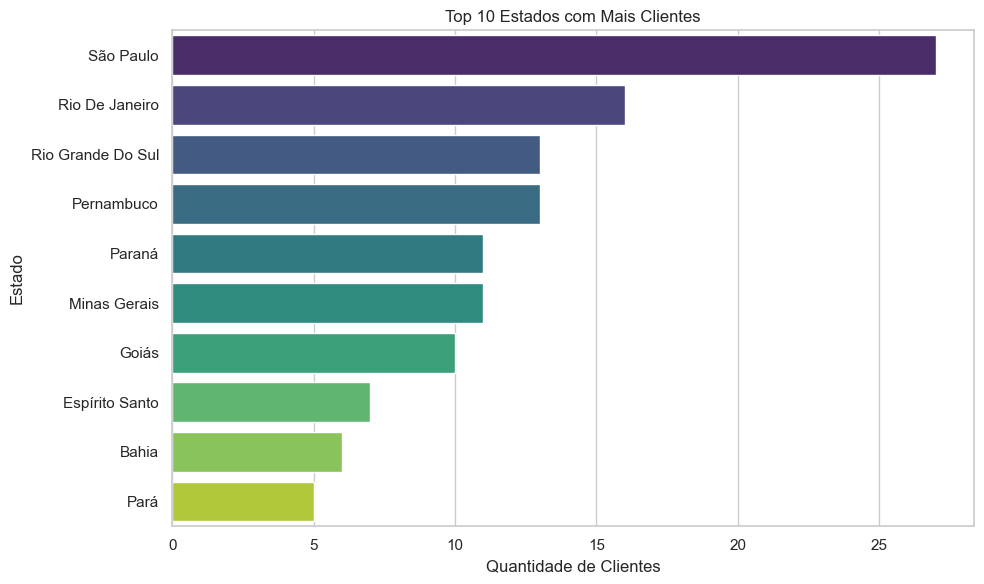

In [121]:
# Distribuição por estado

# Contagem de clientes por estado
clientes_por_estado = clientes_limpo['estado'].value_counts().reset_index()
clientes_por_estado.columns = ['estado', 'qtd_clientes']

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=clientes_por_estado.head(10),
    x='qtd_clientes',
    y='estado',
    hue='estado',              # Adicionado para evitar o FutureWarning
    palette='viridis',
    legend=False               # Remove a legenda já que cada barra já tem rótulo no eixo Y
)
plt.title('Top 10 Estados com Mais Clientes')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Clientes por Região'}, ylabel='qtd_clientes'>

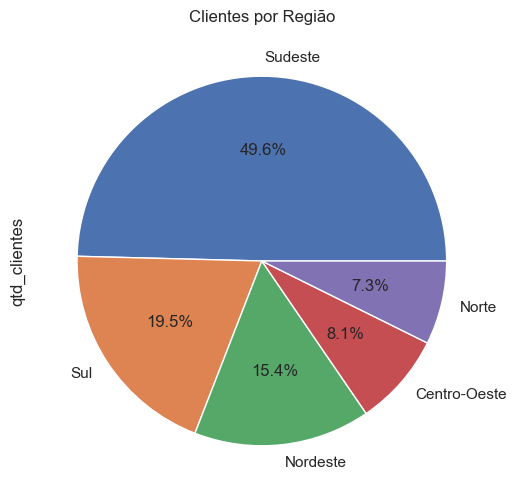

In [123]:
# Contagem de clientes por região

clientes_por_regiao = clientes_limpo['regiao'].value_counts().reset_index()
clientes_por_regiao.columns = ['regiao', 'qtd_clientes']

# Gráfico de pizza por região
clientes_por_regiao.set_index('regiao').plot(
    kind='pie', y='qtd_clientes', autopct='%1.1f%%', legend=False, title='Clientes por Região'
)

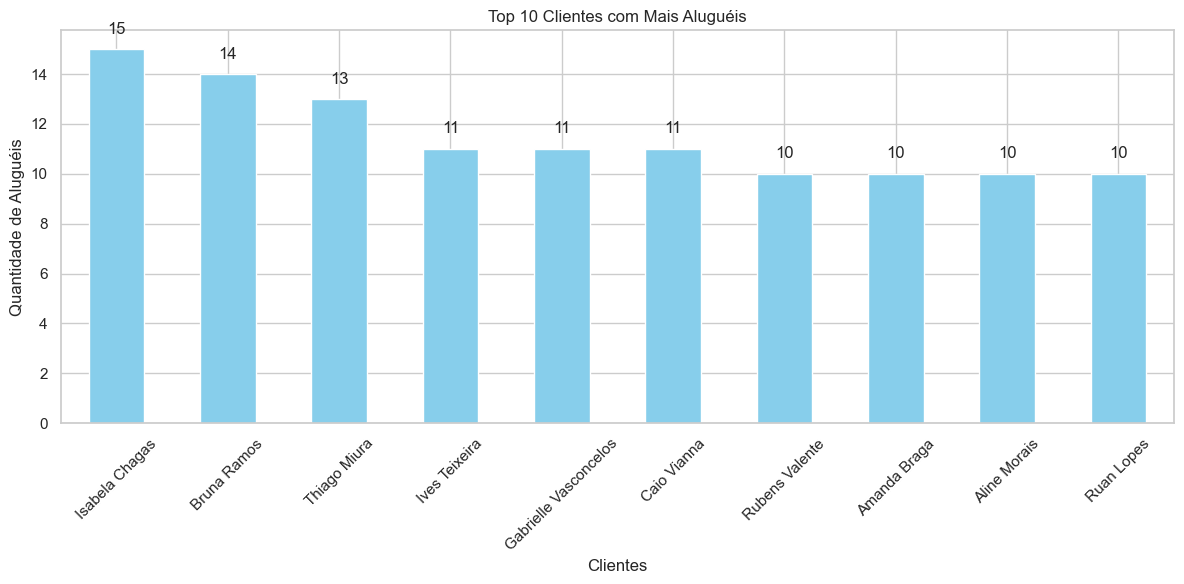

In [125]:
# Clientes com maior número de aluguéis

# Contagem de aluguéis por cliente
alugueis_por_cliente = alugueis_limpo.groupby('id_cliente')['id_aluguel'].count().reset_index()
alugueis_por_cliente.columns = ['id_cliente', 'qtd_alugueis']

# Junta com nomes
top_clientes = alugueis_por_cliente.merge(clientes_limpo[['id_cliente', 'nome_cliente']], on='id_cliente')
top_10 = top_clientes.sort_values(by='qtd_alugueis', ascending=False).head(10)
top_10.set_index('nome_cliente', inplace=True)

# Gráfico
ax = top_10['qtd_alugueis'].plot(kind='bar', title='Top 10 Clientes com Mais Aluguéis', color='skyblue')
for i, v in enumerate(top_10['qtd_alugueis']):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.ylabel('Quantidade de Aluguéis')
plt.xlabel('Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


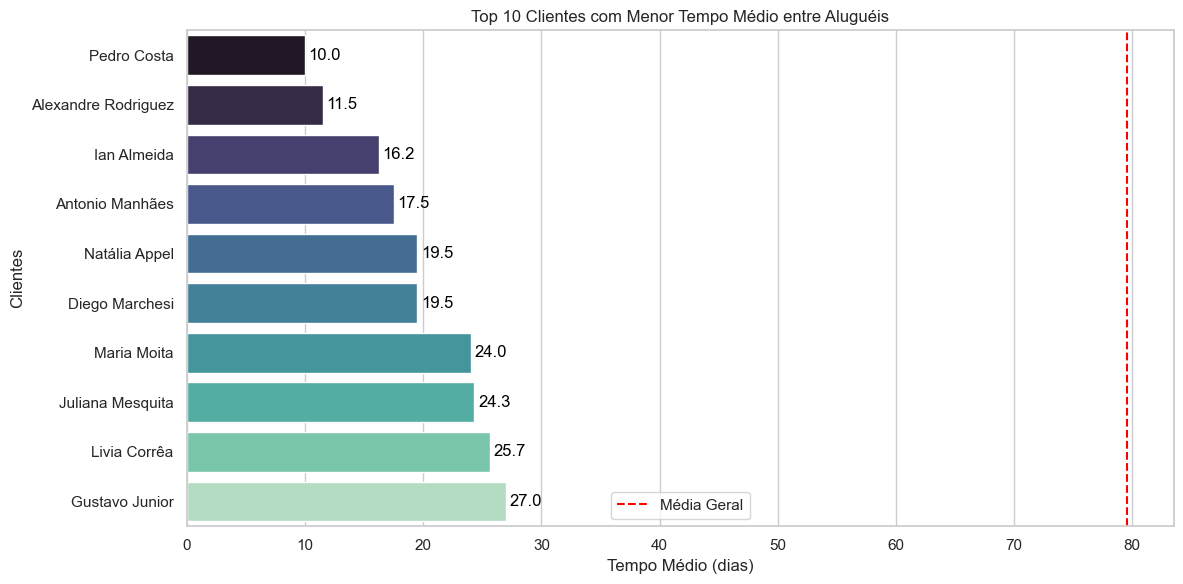

In [127]:
# Ordena por cliente e data
alugueis_ordenados = alugueis_limpo.sort_values(by=['id_cliente', 'data_aluguel'])

# Calcula a diferença entre os aluguéis
alugueis_ordenados['dias_entre_alugueis'] = alugueis_ordenados.groupby('id_cliente')['data_aluguel'].diff().dt.days

# Tempo médio por cliente
tempo_medio = alugueis_ordenados.groupby('id_cliente')['dias_entre_alugueis'].mean().reset_index()
tempo_medio.columns = ['id_cliente', 'tempo_medio_dias']

# Junta com nome
tempo_medio = tempo_medio.merge(clientes_limpo[['id_cliente', 'nome_cliente']], on='id_cliente')

# Top 10 clientes com menor tempo médio entre aluguéis
tempo_medio_top = tempo_medio.sort_values(by='tempo_medio_dias').head(10)

# Média geral
media_geral_tempo = tempo_medio['tempo_medio_dias'].mean()

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=tempo_medio_top,
    x='tempo_medio_dias',
    y='nome_cliente',
    hue='nome_cliente',       
    palette='mako',
    legend=False              # Não precisa da legenda porque o y já é o nome
)

# Linha da média geral
plt.axvline(media_geral_tempo, color='red', linestyle='--', label='Média Geral')

# Rótulos nas barras
for i, v in enumerate(tempo_medio_top['tempo_medio_dias']):
    ax.text(v + 0.3, i, f'{v:.1f}', color='black', va='center')

# Estética
plt.title('Top 10 Clientes com Menor Tempo Médio entre Aluguéis')
plt.xlabel('Tempo Médio (dias)')
plt.ylabel('Clientes')
plt.legend()
plt.tight_layout()
plt.show()


#### 5.2 Análise de Filmes
- Filmes mais alugados
- Gêneros mais populares
- Duração média dos filmes

In [129]:
filmes_populares = alugueis_limpo.groupby('id_filme')['id_aluguel'].count().reset_index()
filmes_populares = filmes_populares.merge(filmes, on='id_filme')
filmes_populares.sort_values(by='id_aluguel', ascending=False).head(10)


,id_filme,id_aluguel,titulo,genero,duracao,ano_lancamento,preco_aluguel
40,41,15,O Reino,Drama,110,2007,2.09
3,4,14,Dia de Treinamento,Drama,122,2001,1.79
35,36,13,As Torres Gêmeas,Drama,129,2006,1.59
24,25,13,Bridget Jones: No Limite da Razão,Drama,108,2004,2.89
26,27,13,Monster - Desejo Assassino,Drama,109,2004,2.09
48,49,13,Harry Potter e o Enigma do Príncipe,Ficção e Fantasia,153,2009,1.59
60,61,12,Harry Potter e as Relíquias da Morte: Parte 2,Ficção e Fantasia,130,2011,1.99
51,52,12,Jogo de Poder,Drama,108,2010,2.89
62,63,11,Django Livre,Ação e Aventura,165,2012,2.69
28,29,11,Tudo por Dinheiro,Drama,122,2005,2.79


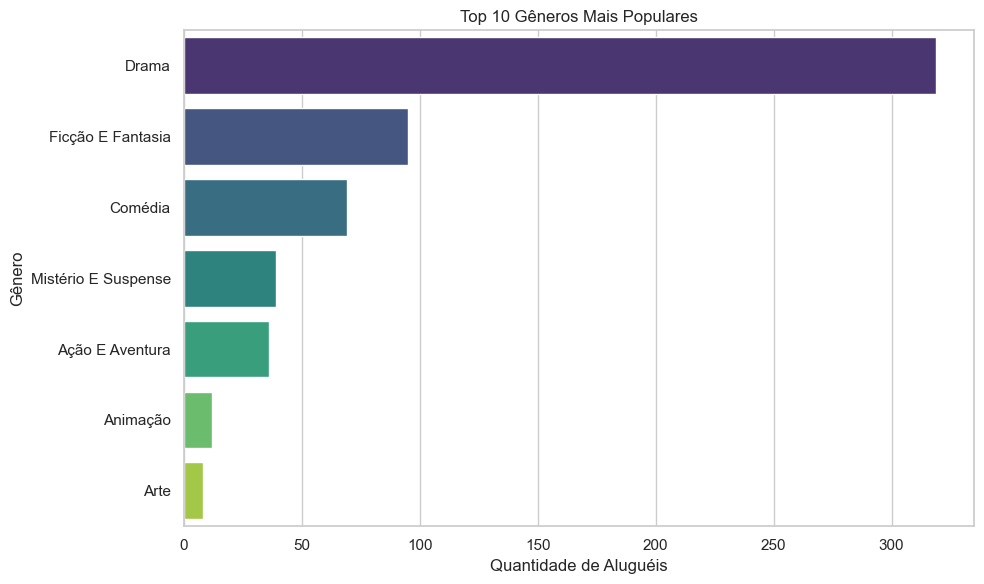

In [131]:
# Gêneros mais populares com base nos aluguéis
generos_populares = alugueis_limpo.merge(filmes_limpo, on='id_filme')  # junta os dados de aluguéis com os filmes
generos_populares = generos_populares.groupby('genero')['id_aluguel'].count().reset_index()
generos_populares = generos_populares.sort_values(by='id_aluguel', ascending=False)

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=generos_populares.head(10), x='id_aluguel', y='genero', hue='genero', palette='viridis', legend=False)
plt.title('Top 10 Gêneros Mais Populares')
plt.xlabel('Quantidade de Aluguéis')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()


In [133]:
# Duração média dos filmes

query1 = """
SELECT 
    ROUND(AVG(duracao), 2) AS duracao_media_filmes
FROM filmes;
"""

pd.read_sql(query1, engine)

,duracao_media_filmes
0,121.01


#### 5.3 Análise de Aluguéis
- Volume de aluguéis por mês/ano
- Sazonalidade (dias da semana, meses)
- Frequência média por cliente


<Axes: title={'center': 'Aluguéis por Mês'}, xlabel='ano_mes'>

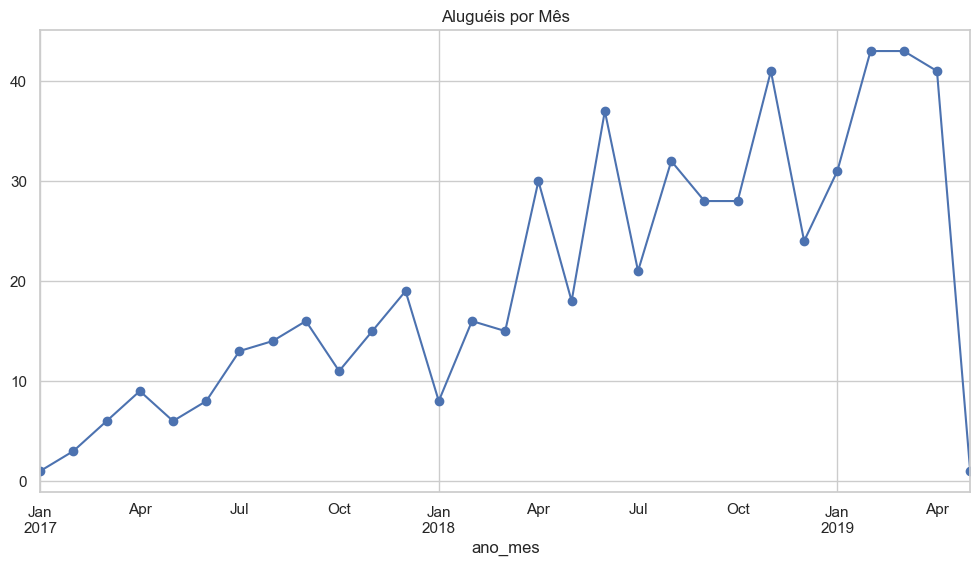

In [135]:
# Evolução mensal dos aluguéis.

alugueis_limpo['data_aluguel'] = pd.to_datetime(alugueis_limpo['data_aluguel'])
alugueis_limpo['ano_mes'] = alugueis_limpo['data_aluguel'].dt.to_period('M')

alugueis_por_mes = alugueis_limpo.groupby('ano_mes')['id_aluguel'].count()
alugueis_por_mes.plot(kind='line', marker='o', title='Aluguéis por Mês')


In [137]:
# Média de alugueis por clientes

# Agrupa e conta aluguéis por cliente
alugueis_por_cliente = alugueis_limpo.groupby('id_cliente')['id_aluguel'].count()

# Calcula a média
frequencia_media = alugueis_por_cliente.mean()
print(f'Frequência média de aluguéis por cliente: {frequencia_media:.2f}')


Frequência média de aluguéis por cliente: 4.98


<Axes: title={'center': 'Aluguéis por Dia da Semana'}, xlabel='dia_semana'>

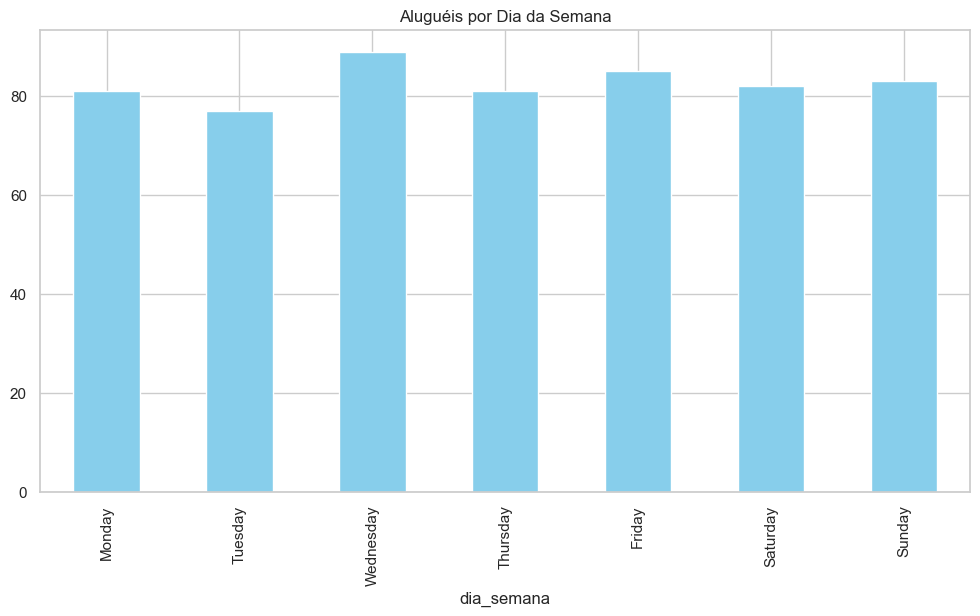

In [145]:
# Dias da semana com mais aluguéis

# Cria uma nova coluna com o nome do dia da semana (em inglês)
alugueis_limpo['dia_semana'] = alugueis_limpo['data_aluguel'].dt.day_name()

# Conta os aluguéis por dia da semana, na ordem correta
alugueis_por_dia = alugueis_limpo['dia_semana'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
alugueis_por_dia.plot(kind='bar', title='Aluguéis por Dia da Semana', color='skyblue')


<Axes: title={'center': 'Aluguéis por Mês'}, xlabel='mes'>

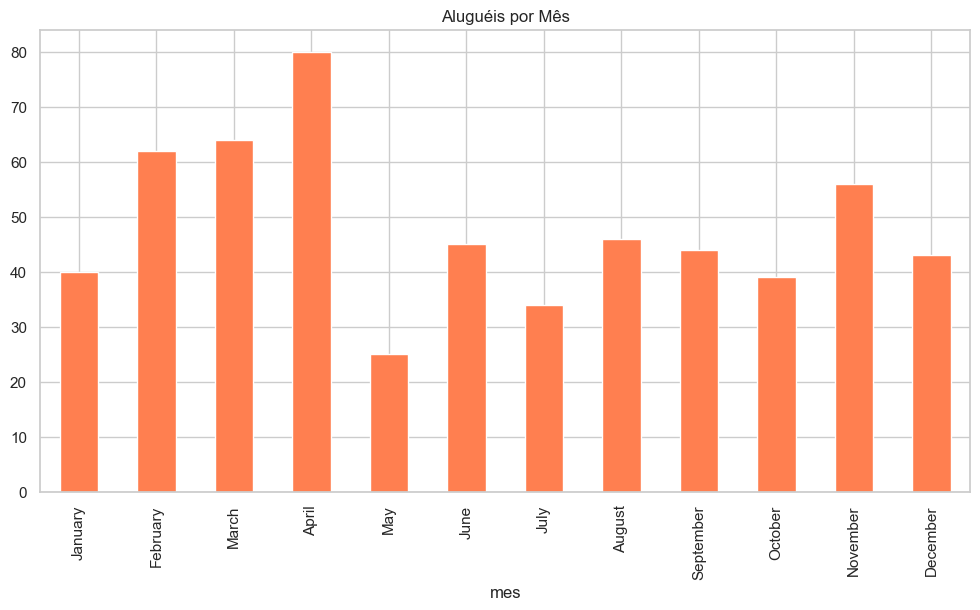

In [149]:
# Meses com mais aluguéis

# Cria uma coluna com o nome do mês
alugueis_limpo['mes'] = alugueis_limpo['data_aluguel'].dt.month_name()

# Contagem por mês (organizando em ordem de janeiro a dezembro)
ordem_meses = ['January','February','March','April','May','June','July','August','September','October','November','December']
alugueis_por_mes_nome = alugueis_limpo['mes'].value_counts().reindex(ordem_meses)

# Plot
alugueis_por_mes_nome.plot(kind='bar', title='Aluguéis por Mês', color='coral')


#### 5.4 Análise de Atores
- Atores mais presentes nos filmes

<Axes: title={'center': 'Top 10 Atores Mais Presentes nos Filmes'}, ylabel='ator'>

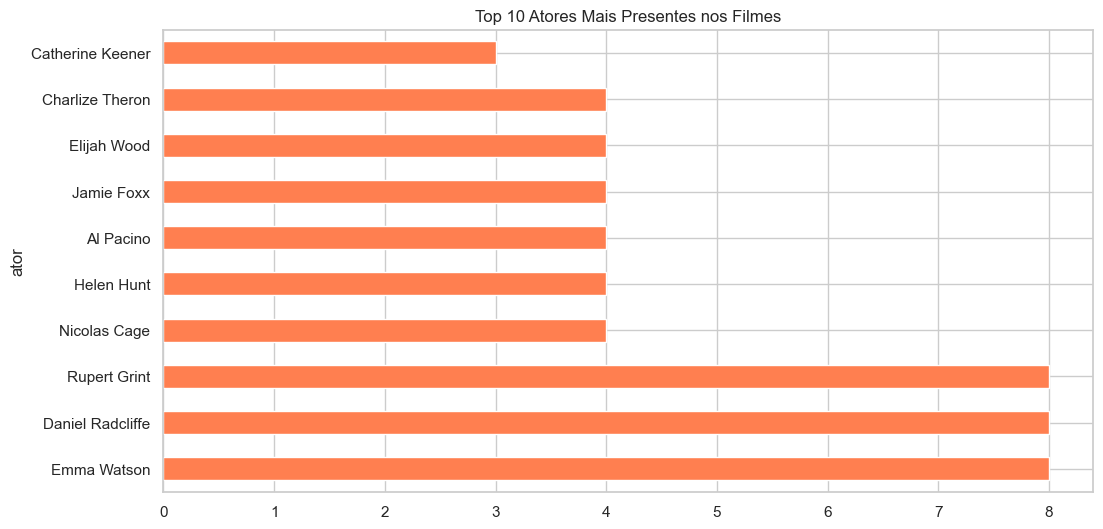

In [151]:
# Junta atuações com atores
atuacoes_atores = atuacoes_limpo.merge(atores_limpo, on='id_ator')

# Conta quantos filmes cada ator participou
atores_mais_atuantes = atuacoes_atores['nome_ator'].value_counts().reset_index()
atores_mais_atuantes.columns = ['ator', 'qtd_filmes']

# Top 10
top_10_atores = atores_mais_atuantes.head(10)
top_10_atores.to_csv('top_10_atores_mais_presentes.csv', index=False)

# Gráfico
top_10_atores.set_index('ator').plot(kind='barh', title='Top 10 Atores Mais Presentes nos Filmes', legend=False, color='coral')


#### 5.5 Análise de Atuações
- Atores que aparecem nos filmes mais alugados

<Axes: title={'center': 'Atores em Filmes Mais Alugados'}, xlabel='ator'>

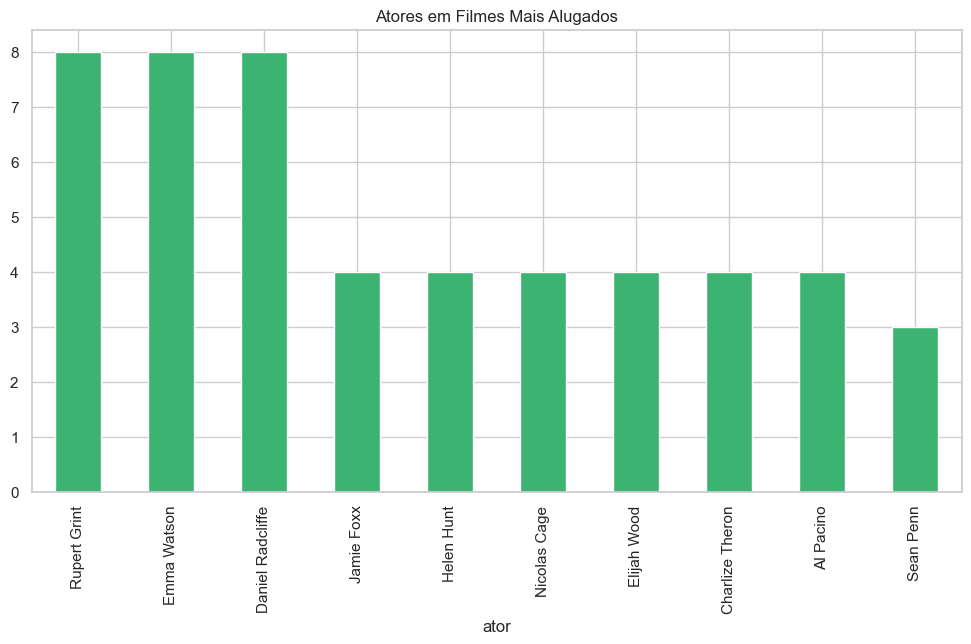

In [157]:
# Filmes mais alugados
filmes_populares = alugueis_limpo['id_filme'].value_counts().reset_index()
filmes_populares.columns = ['id_filme', 'qtd_alugueis']

# Junta com atuações e atores
atuacoes_completo = atuacoes.merge(atores_limpo, on='id_ator').merge(filmes_populares, on='id_filme')

# Agora, ver quais atores participaram dos filmes mais alugados
atores_em_populares = atuacoes_completo.sort_values(by='qtd_alugueis', ascending=False)

# Top 10 atores mais recorrentes em filmes populares
top_atores_populares = atores_em_populares['nome_ator'].value_counts().reset_index().head(10)
top_atores_populares.columns = ['ator', 'qtd_filmes_populares']
top_atores_populares.to_csv('atores_em_filmes_populares.csv', index=False)

# Gráfico
top_atores_populares.set_index('ator').plot(kind='bar', title='Atores em Filmes Mais Alugados', legend=False, color='mediumseagreen')


### 6. Exportação para Power BI
Arquivos CSV gerados para importar e montar o dashboard interativo.

In [189]:
import os

# Exportação das tabelas 
clientes_limpo.to_csv('clientes.csv', index=False)
filmes_limpo.to_csv('filmes.csv', index=False)
alugueis_limpo.to_csv('alugueis.csv', index=False)
atores_limpo.to_csv('atores.csv', index=False)
atuacoes_limpo.to_csv('atuacoes.csv', index=False)



### 7. CONCLUSAO PARCIAL

Nesta primeira etapa da análise exploratória dos dados da locadora fictícia *HashtagMovie*, foi possível obter diversos insights relevantes a partir dos dados extraídos diretamente do banco com SQL e tratados no Jupyter Notebook.

A análise abordou diferentes aspectos do negócio:

- **Clientes:** Identificamos o perfil dos clientes mais ativos e quais localidades concentram mais aluguéis.
- **Filmes:** Foram destacados os filmes mais alugados, bem como o desempenho por categoria.
- **Aluguéis:** Observamos padrões de comportamento, como frequência e volume de aluguéis ao longo do tempo.
- **Atores e atuações:** Avaliamos a participação dos atores em filmes e sua popularidade com base nos aluguéis.

Com base nesses resultados, será possível criar um **dashboard interativo no Power BI** que facilitará a visualização dos indicadores e apoiará a tomada de decisão da empresa. O painel permitirá explorar os dados de forma dinâmica, filtrando por tempo, categorias, clientes, e mais.

Os próximos passos incluem:
- Criação de um modelo de dados otimizado no Power BI
- Definição dos principais KPIs e visuais
- Compartilhamento dos insights de forma visual e estratégica
